In [1]:
import numpy as np
import polars as pl
from pathlib import Path
from utils import plot_utils
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [2]:
# metric:
# the result (experiments) should be done for each alpha
# patch-level
# - empirical coverage (misconverage rate could be obtained from 1 - empirical coverage)
#   - total
#   - only for ihc_score 0,1,2-,2+,3+
#   - only for label 0, 1
# - average set size
#   - total
#   - only for ihc_score 0,1,2-,2+,3+
#   - only for label 0, 1
# - accuracy/precision/recall/f1 for confident predictions only
# - ambiguity rate (size = 2)
#   - total
#   - only for ihc_score 0,1,2-,2+,3+
#   - only for label 0, 1

# case-level
# precision/recall/f1
# ambiguity rate (for case)


In [3]:
root = "/home/surayuth/her2/results_cp/orig_feat_level_16_white_balance_False_scale_0.25_trial_100_n_est_200_model_rf_dryrun_ False"
root = Path(root)
cv = 3
r_min = 0
r_max = 100
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]

Text(0.5, 0.98, 'Percent of Ambiguity')

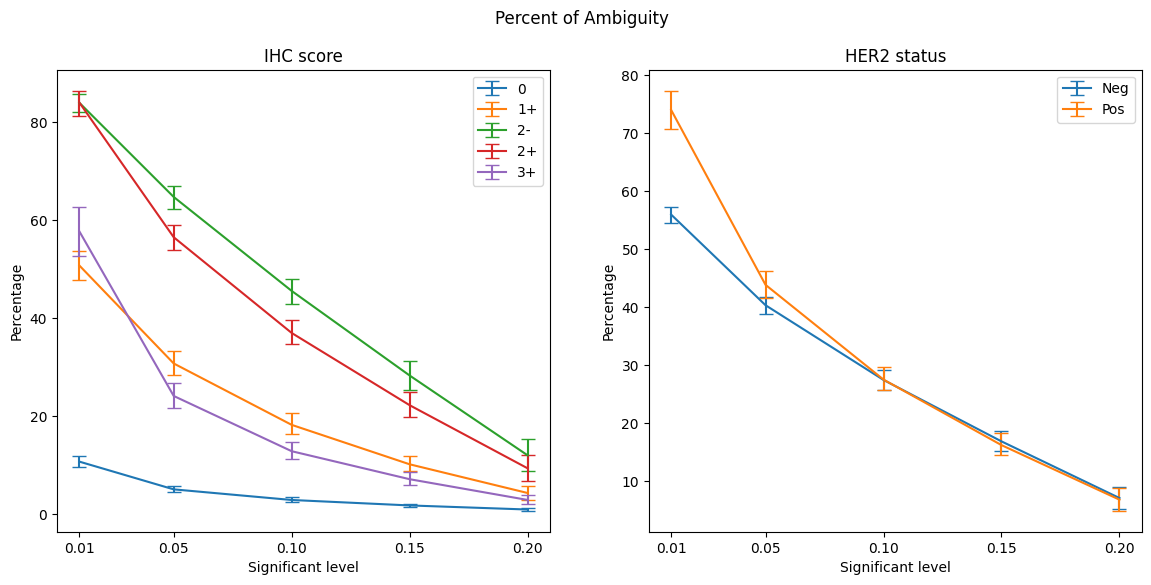

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

col_names1 = [f"ambi{i}" for i in range(5)]
labels1 = ["0", "1+", "2-", "2+", "3+"]

heights1 = plot_utils.agg_heights(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_average_ambi_ihc,
        col_names1
    )

for i, col in enumerate(col_names1):
    lower_error = heights1[col]["err_min"]
    upper_error = heights1[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0].errorbar(
        alphas, 
        heights1[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=labels1[i], capsize=5
    )
axs[0].legend()
axs[0].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[0].set_ylabel("Percentage")
axs[0].set_title("IHC score")
axs[0].set_xlabel("Significant level")


######################################################

col_names2 = [f"ambi{i}" for i in range(2)]
labels2 = ["Neg", "Pos"]

heights2 = plot_utils.agg_heights(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_average_ambi_her2,
        col_names2
    )

for i, col in enumerate(col_names2):
    lower_error = heights2[col]["err_min"]
    upper_error = heights2[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[1].errorbar(
        alphas, 
        heights2[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=labels2[i], capsize=5
    )
axs[1].legend()
axs[1].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[1].set_ylabel("Percentage")
axs[1].set_title("HER2 status")
axs[1].set_xlabel("Significant level")

fig.suptitle("Percent of Ambiguity")

Text(0.5, 0.98, 'Percent Coverage')

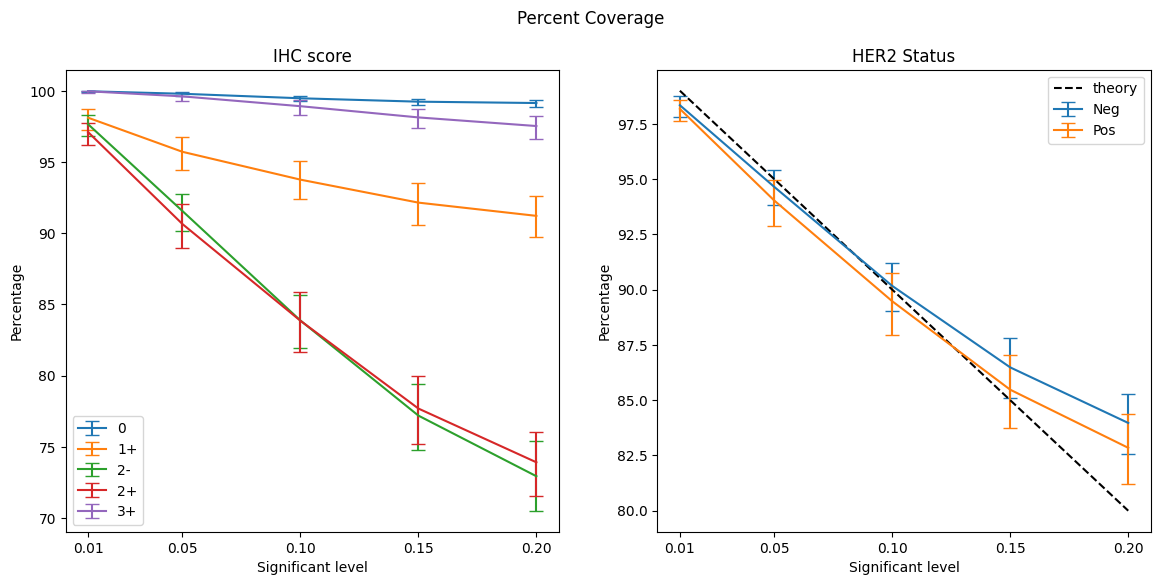

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

col_names1 = [f"cover{i}" for i in range(5)]
labels1 = ["0", "1+", "2-", "2+", "3+"]

heights1 = plot_utils.agg_heights(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_coverage_ihc,
        col_names1
    )

for i, col in enumerate(col_names1):
    lower_error = heights1[col]["err_min"]
    upper_error = heights1[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0].errorbar(
        alphas, 
        heights1[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=labels1[i], capsize=5
    )
axs[0].legend()
axs[0].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[0].set_ylabel("Percentage")
axs[0].set_title("IHC score")
axs[0].set_xlabel("Significant level")

######################################################

col_names2 = [f"cover{i}" for i in range(2)]
labels2 = ["Neg", "Pos"]

heights2 = plot_utils.agg_heights(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_coverage_her2,
        col_names2
    )

for i, col in enumerate(col_names2):
    lower_error = heights2[col]["err_min"]
    upper_error = heights2[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[1].errorbar(
        alphas, 
        heights2[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=labels2[i], capsize=5
    )

axs[1].plot(
    np.array(alphas),
    (1 - np.array(alphas)) * 100,
    linestyle="--",
    c="k",
    label="theory"
)
axs[1].legend()
axs[1].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[1].set_title("HER2 status")
axs[1].set_ylabel("Percentage")
axs[1].set_xlabel("Significant level")

fig.suptitle("Percent Coverage")

Text(0.5, 1.0, 'Ambiguity predictions of 2+ cases')

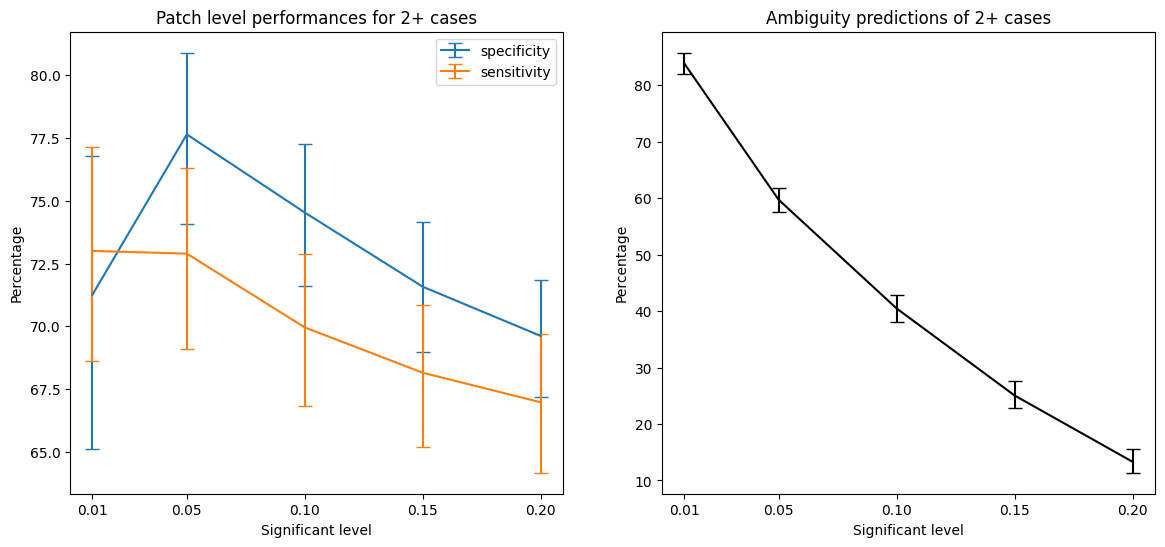

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

col_names = ["specificity", "sensitivity", "ambi"]

heights = plot_utils.agg_heights(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_tpr_fpr,
        col_names
    )

for i, col in enumerate(col_names[:-1]):
    lower_error = heights[col]["err_min"]
    upper_error = heights[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0].errorbar(
        alphas, 
        heights[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )
    # x = alphas
    # y1 = np.array(heights[col]["mean"]) - np.array(heights[col]["err_min"])
    # y2 = np.array(heights[col]["mean"]) + np.array(heights[col]["err_max"])
    #axs[0].fill_between(x, y1, y2, alpha=.2)

axs[0].set_xlabel("Significant level")
axs[0].set_ylabel("Percentage")
axs[0].legend()
axs[0].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[0].set_title("Patch level performances for 2+ cases")


lower_error = heights["ambi"]["err_min"]
upper_error = heights["ambi"]["err_max"]
asymmetric_error = [lower_error, upper_error]
axs[1].errorbar(
    alphas, 
    heights["ambi"]["mean"], 
    yerr=asymmetric_error, fmt='-', 
    label="ambi", capsize=5,
    c="k"
)

axs[1].set_xlabel("Significant level")
axs[1].set_ylabel("Percentage")
axs[1].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[1].set_title("Ambiguity predictions of 2+ cases")